# Flight Delay Analysis using H2O Package

In [2]:
# import a file from S3:
!pip install h2o
import h2o
h2o.init()
airlines = "http://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip"
airlines_df = h2o.import_file(path=airlines)

     |████████████████████████████████| 126.2MB 79kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.3-py2.py3-none-any.whl size=126303006 sha256=50b2f1482822d1e28b2083d8d270e1b566103a574f9ddf211344326a0c7e8361
  Stored in directory: /root/.cache/pip/wheels/fa/7c/ce/95ae52b4d3f1b14a27c3c961c1f94635aee841ab1eec3aeeca
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphtuo3yo_
  JVM stdout: /tmp/tmphtuo3yo_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphtuo3yo_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
C

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_unknownUser_z8o4de
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
train, valid, test = airlines_df.split_frame([0.8,0.1],seed=2020)

In [10]:
print(train.nrows)
print(valid.nrows)
print(test.nrows)

35242
4274
4462


In [0]:
y = 'IsArrDelayed'
ignoreFields = ['ArrDelay', 'DeepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
                'IsDepDelayed','IsArrDelayed','ActuralElapsedTime']
x = [i for i in train.names if i not in ignoreFields]
# xLikely =['Month','DayOfWeek','UniqueCarrier','Origin,Dest','Distance','Cancelled','Diverted']

# Random Forest

In [0]:
# Import H2O RF:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [0]:
# Initialize the RF estimator:

rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', seed=1)

In [25]:
rf_fit1.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


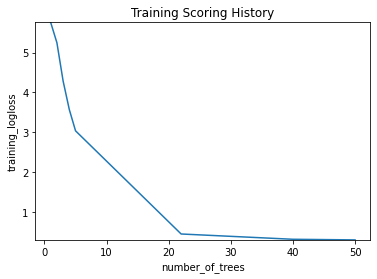

In [26]:
rf_fit1.plot()

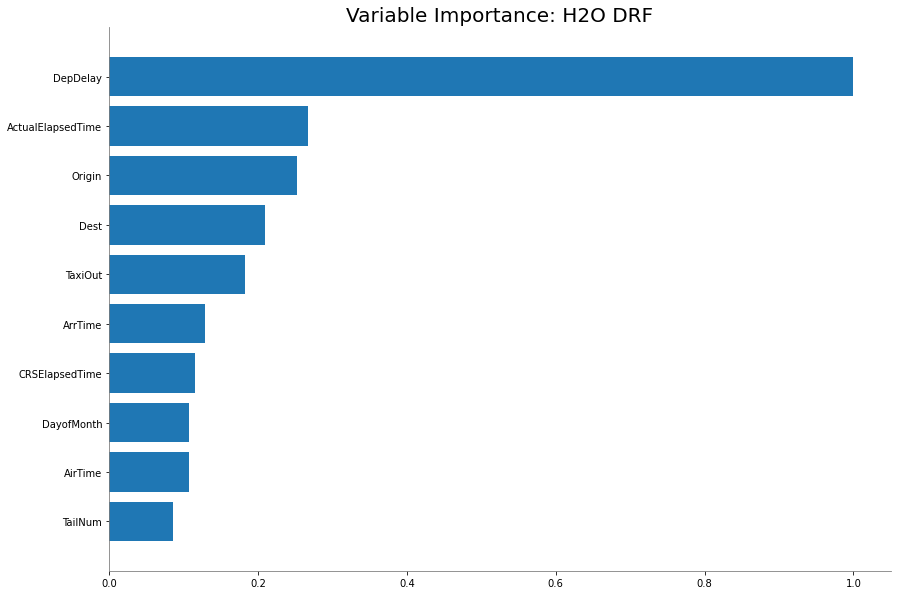

In [27]:
rf_fit1.varimp_plot()

In [28]:
rf_fit1.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-18 05:08:16,0.144 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-03-18 05:08:17,1.392 sec,1.0,0.435154,5.751956,0.811806,0.154979,1.509251,0.199581
2,,2020-03-18 05:08:18,2.358 sec,2.0,0.431007,5.243939,0.816281,0.193629,1.518979,0.210267
3,,2020-03-18 05:08:19,3.124 sec,3.0,0.411652,4.285306,0.834786,0.223712,1.550505,0.200677
4,,2020-03-18 05:08:19,3.563 sec,4.0,0.400573,3.569918,0.846596,0.257584,1.579525,0.197418
5,,2020-03-18 05:08:19,3.925 sec,5.0,0.388976,3.040577,0.858479,0.283261,1.604886,0.191884
6,,2020-03-18 05:08:24,8.057 sec,22.0,0.315453,0.460149,0.937914,0.594101,1.771730,0.133591
7,,2020-03-18 05:08:28,12.244 sec,40.0,0.305508,0.327902,0.949478,0.704123,1.790948,0.125844
8,,2020-03-18 05:08:30,14.514 sec,50.0,0.303273,0.312431,0.951684,0.739587,1.794794,0.121191


 Let's increase the number of trees

In [29]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', ntrees=100, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


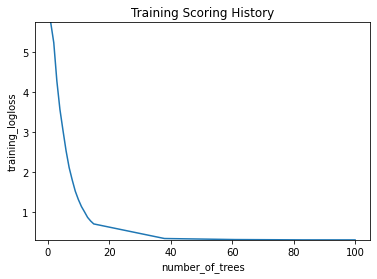

In [30]:
rf_fit2.plot()

In [0]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)

In [32]:
rf_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08775511375408736
RMSE: 0.29623489624635274
LogLoss: 0.2937265356657134
Mean Per-Class Error: 0.11180928283605596
AUC: 0.9583142572334947
AUCPR: 0.8492093340358405
Gini: 0.9166285144669895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44794184671285053: 


,,NO,YES,Error,Rate
0,NO,1706.0,302.0,0.1504,(302.0/2008.0)
1,YES,201.0,2253.0,0.0819,(201.0/2454.0)
2,Total,1907.0,2555.0,0.1127,(503.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.447942,0.899581,217.0
1,max f2,0.335179,0.932390,257.0
2,max f0point5,0.601322,0.917761,164.0
3,max accuracy,0.447942,0.887270,217.0
4,max precision,0.999969,1.000000,0.0
5,max recall,0.059310,1.000000,370.0
6,max specificity,0.999969,1.000000,0.0
7,max absolute_mcc,0.558847,0.772573,179.0
8,max min_per_class_accuracy,0.506195,0.884678,198.0
9,max mean_per_class_accuracy,0.558847,0.888191,179.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.040117,1.000000,1.818256,1.818256,1.000000,1.000000,1.000000,1.000000,0.072942,0.072942,81.825591,81.825591
1,,2,0.040117,0.999990,0.000000,1.818256,0.000000,0.000000,1.000000,1.000000,0.000000,0.072942,-100.000000,81.825591
2,,3,0.060959,0.999978,1.818256,1.818256,1.000000,0.999978,1.000000,0.999992,0.037897,0.110839,81.825591,81.825591
3,,4,0.118557,0.980000,1.818256,1.818256,1.000000,0.987248,1.000000,0.993801,0.104727,0.215566,81.825591,81.825591
4,,5,0.150157,0.960267,1.818256,1.818256,1.000000,0.971367,1.000000,0.989080,0.057457,0.273024,81.825591,81.825591
5,,6,0.205961,0.940000,1.803651,1.814299,0.991968,0.952200,0.997824,0.979087,0.100652,0.373676,80.365144,81.429888
6,,7,0.300090,0.857530,1.770635,1.800603,0.973810,0.901572,0.990291,0.954773,0.166667,0.540342,77.063492,80.060294
7,,8,0.400045,0.724588,1.651107,1.763250,0.908072,0.792459,0.969748,0.914217,0.165037,0.705379,65.110682,76.324985
8,,9,0.500000,0.573053,1.426882,1.696007,0.784753,0.653898,0.932766,0.862177,0.142624,0.848003,42.688244,69.600652
9,,10,0.599955,0.408152,0.905051,1.564230,0.497758,0.487079,0.860291,0.799684,0.090465,0.938468,-9.494885,56.422987


rf_perf2 model is better than rf_perf1!!!

In [33]:
rf_perf2


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08600208789797649
RMSE: 0.2932611257872009
LogLoss: 0.2900319021698781
Mean Per-Class Error: 0.10700880260538936
AUC: 0.9607609699750306
AUCPR: 0.9184065297835389
Gini: 0.9215219399500612

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4664470295608044: 


,,NO,YES,Error,Rate
0,NO,1731.0,277.0,0.1379,(277.0/2008.0)
1,YES,201.0,2253.0,0.0819,(201.0/2454.0)
2,Total,1932.0,2530.0,0.1071,(478.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.466447,0.904093,218.0
1,max f2,0.338283,0.933124,260.0
2,max f0point5,0.622299,0.920257,162.0
3,max accuracy,0.493031,0.893321,208.0
4,max precision,0.999979,1.000000,0.0
5,max recall,0.059439,1.000000,371.0
6,max specificity,0.999979,1.000000,0.0
7,max absolute_mcc,0.493031,0.784551,208.0
8,max min_per_class_accuracy,0.504737,0.890936,203.0
9,max mean_per_class_accuracy,0.509951,0.892991,201.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.13 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010309,1.000000,1.818256,1.818256,1.000000,1.000000,1.000000,1.000000,0.018745,0.018745,81.825591,81.825591
1,,2,0.026670,0.999989,1.818256,1.818256,1.000000,0.999989,1.000000,0.999993,0.029747,0.048492,81.825591,81.825591
2,,3,0.030255,0.998860,1.818256,1.818256,1.000000,0.999243,1.000000,0.999904,0.006520,0.055012,81.825591,81.825591
3,,4,0.040117,0.996620,1.818256,1.818256,1.000000,0.997782,1.000000,0.999383,0.017930,0.072942,81.825591,81.825591
4,,5,0.050202,0.990822,1.818256,1.818256,1.000000,0.993933,1.000000,0.998288,0.018337,0.091280,81.825591,81.825591
5,,6,0.101524,0.980000,1.818256,1.818256,1.000000,0.986031,1.000000,0.992092,0.093317,0.184597,81.825591,81.825591
6,,7,0.156208,0.960000,1.818256,1.818256,1.000000,0.969531,1.000000,0.984194,0.099430,0.284026,81.825591,81.825591
7,,8,0.200134,0.939007,1.818256,1.818256,1.000000,0.949199,1.000000,0.976513,0.079870,0.363896,81.825591,81.825591
8,,9,0.300090,0.855674,1.793795,1.810108,0.986547,0.903896,0.995519,0.952325,0.179299,0.543195,79.379507,81.010838
9,,10,0.400045,0.730184,1.651107,1.770380,0.908072,0.794687,0.973669,0.912938,0.165037,0.708231,65.110682,77.038026


Cross-validate performance

In [35]:
rf_fit3 = H2ORandomForestEstimator(model_id='rf_fit3', seed=1, nfolds=5)
rf_fit3.train(x=x, y=y, training_frame=airlines_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


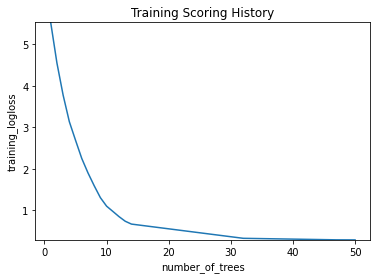

In [36]:
rf_fit3.plot()

In [0]:
rf_perf3 = rf_fit3.model_performance(test)

In [38]:
rf_perf3


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.02439404053734579
RMSE: 0.15618591657811465
LogLoss: 0.12699711609052428
Mean Per-Class Error: 0.002671262789104345
AUC: 0.9999566729008984
AUCPR: 0.8544881131886624
Gini: 0.9999133458017968

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.467026755809784: 


,,NO,YES,Error,Rate
0,NO,2003.0,5.0,0.0025,(5.0/2008.0)
1,YES,7.0,2447.0,0.0029,(7.0/2454.0)
2,Total,2010.0,2452.0,0.0027,(12.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.467027,0.997554,204.0
1,max f2,0.441861,0.997882,207.0
2,max f0point5,0.521448,0.998197,197.0
3,max accuracy,0.467027,0.997311,204.0
4,max precision,0.999968,1.000000,0.0
5,max recall,0.360331,1.000000,226.0
6,max specificity,0.999968,1.000000,0.0
7,max absolute_mcc,0.467027,0.994568,204.0
8,max min_per_class_accuracy,0.467027,0.997148,204.0
9,max mean_per_class_accuracy,0.467027,0.997329,204.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.14 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.062976,1.000000,1.818256,1.818256,1.0,1.000000,1.000000,1.000000,0.114507,0.114507,81.825591,81.825591
1,,2,0.104886,0.992165,1.818256,1.818256,1.0,0.996918,1.000000,0.998769,0.076202,0.190709,81.825591,81.825591
2,,3,0.150157,0.981992,1.818256,1.818256,1.0,0.988239,1.000000,0.995594,0.082315,0.273024,81.825591,81.825591
3,,4,0.200134,0.977083,1.818256,1.818256,1.0,0.979556,1.000000,0.991589,0.090872,0.363896,81.825591,81.825591
4,,5,0.300090,0.937200,1.818256,1.818256,1.0,0.958185,1.000000,0.980463,0.181744,0.545640,81.825591,81.825591
5,,6,0.400045,0.857314,1.818256,1.818256,1.0,0.900447,1.000000,0.960470,0.181744,0.727384,81.825591,81.825591
6,,7,0.500000,0.712391,1.818256,1.818256,1.0,0.791248,1.000000,0.926641,0.181744,0.909128,81.825591,81.825591
7,,8,0.599955,0.262263,0.909128,1.666791,0.5,0.480139,0.916698,0.852252,0.090872,1.000000,-9.087205,66.679118
8,,9,0.699910,0.152398,0.000000,1.428754,0.0,0.199951,0.785783,0.759096,0.000000,1.000000,-100.000000,42.875440
9,,10,0.799866,0.088525,0.000000,1.250210,0.0,0.117319,0.687588,0.678896,0.000000,1.000000,-100.000000,25.021014


In [39]:
print("Best rf model1 AUC: %.4f" % (rf_perf1.auc()))

Best rf model1 AUC: 0.9583


In [40]:
print("Best rf model2 AUC: %.4f" % (rf_perf2.auc()))

Best rf model2 AUC: 0.9608


In [49]:
print("Best rf model3 AUC: %.4f" % (rf_fit3.auc(xval=True)))

Best rf model3 AUC: 0.9597


## Gradient Boosting Machine

In [0]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [43]:
gbm_fit1 = H2OGradientBoostingEstimator(model_id='gbm_fit1', seed=1,nfolds=3)
gbm_fit1.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
gbm_fit1.predict(test_data=test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,NO,YES
YES,0.1716,0.8284
YES,0.0161047,0.983895
YES,0.226356,0.773644
YES,0.0119199,0.98808
YES,0.282339,0.717661
YES,0.100766,0.899234
YES,0.22216,0.77784
YES,0.0283695,0.97163
YES,0.0461033,0.953897
YES,0.349224,0.650776


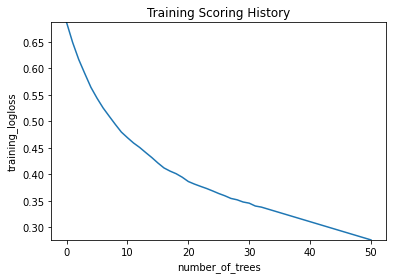

In [45]:
gbm_fit1.plot()

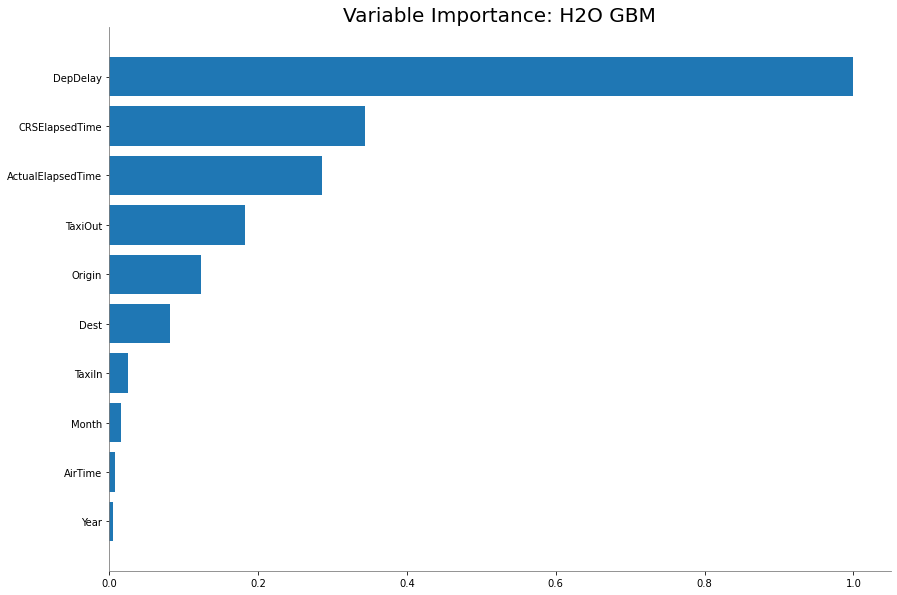

In [46]:
gbm_fit1.varimp_plot()

In [0]:
gbm_perf1 = gbm_fit1.model_performance(test)

In [48]:
gbm_perf1


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08771452173449418
RMSE: 0.29616637509091776
LogLoss: 0.2982914785230944
Mean Per-Class Error: 0.10512940089682021
AUC: 0.9606098832055641
AUCPR: 0.9672397534816101
Gini: 0.9212197664111281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4647677208509154: 


,,NO,YES,Error,Rate
0,NO,1767.0,241.0,0.12,(241.0/2008.0)
1,YES,223.0,2231.0,0.0909,(223.0/2454.0)
2,Total,1990.0,2472.0,0.104,(464.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.464768,0.905806,212.0
1,max f2,0.296370,0.931834,277.0
2,max f0point5,0.600302,0.919876,167.0
3,max accuracy,0.464768,0.896011,212.0
4,max precision,0.991394,1.000000,0.0
5,max recall,0.126176,1.000000,352.0
6,max specificity,0.991394,1.000000,0.0
7,max absolute_mcc,0.464768,0.789778,212.0
8,max min_per_class_accuracy,0.488306,0.892928,204.0
9,max mean_per_class_accuracy,0.478940,0.894871,207.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.26 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010085,0.986097,1.818256,1.818256,1.000000,0.987958,1.000000,0.987958,0.018337,0.018337,81.825591,81.825591
1,,2,0.020170,0.984537,1.818256,1.818256,1.000000,0.985309,1.000000,0.986633,0.018337,0.036675,81.825591,81.825591
2,,3,0.030031,0.983036,1.818256,1.818256,1.000000,0.983762,1.000000,0.985690,0.017930,0.054605,81.825591,81.825591
3,,4,0.040117,0.981520,1.818256,1.818256,1.000000,0.982363,1.000000,0.984854,0.018337,0.072942,81.825591,81.825591
4,,5,0.050202,0.980152,1.818256,1.818256,1.000000,0.980844,1.000000,0.984048,0.018337,0.091280,81.825591,81.825591
5,,6,0.100403,0.974419,1.818256,1.818256,1.000000,0.976947,1.000000,0.980498,0.091280,0.182559,81.825591,81.825591
6,,7,0.150157,0.966106,1.818256,1.818256,1.000000,0.970229,1.000000,0.977095,0.090465,0.273024,81.825591,81.825591
7,,8,0.200134,0.947643,1.818256,1.818256,1.000000,0.957924,1.000000,0.972308,0.090872,0.363896,81.825591,81.825591
8,,9,0.300090,0.861116,1.761181,1.799245,0.968610,0.908783,0.989544,0.951149,0.176039,0.539935,76.118061,79.924502
9,,10,0.400045,0.719982,1.638876,1.759175,0.901345,0.788191,0.967507,0.910432,0.163814,0.703749,63.887640,75.917532


In [51]:
gbm_fit1.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4371292652772207: 


,,NO,YES,Error,Rate
0,NO,13684.0,1963.0,0.1255,(1963.0/15647.0)
1,YES,1172.0,18423.0,0.0598,(1172.0/19595.0)
2,Total,14856.0,20386.0,0.089,(3135.0/35242.0)


Train a GBM with more trees

In [52]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2', ntrees=500, seed=1)
gbm_fit2.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Train a GBM with early stopping

In [53]:
gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     # early stopping
                                        stopping_rounds=3,         # early stopping
                                        stopping_metric='AUC',     # early stopping
                                        stopping_tolerance=0.0005, # early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
gbm_perf1 = gbm_fit1.model_performance(test)
gbm_perf2 = gbm_fit2.model_performance(test)
gbm_perf3 = gbm_fit3.model_performance(test)

In [55]:
print(gbm_perf1.auc())
print(gbm_perf2.auc())
print(gbm_perf3.auc())

0.9606098832055641
0.9956535918266624
0.9921804225640227


It is improved more than previous model

In [56]:
gbm_fit1.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-18 05:14:17,19.964 sec,0.0,0.496853,0.686859,0.500000,0.000000,1.000000,0.443987
1,,2020-03-18 05:14:17,20.089 sec,1.0,0.477736,0.649002,0.860618,0.902717,1.795281,0.232251
2,,2020-03-18 05:14:17,20.172 sec,2.0,0.461117,0.616887,0.873910,0.909960,1.795197,0.236735
3,,2020-03-18 05:14:17,20.255 sec,3.0,0.447187,0.590281,0.881667,0.915120,1.798520,0.213864
4,,2020-03-18 05:14:17,20.356 sec,4.0,0.433486,0.564439,0.894123,0.747318,1.798520,0.192356
5,,2020-03-18 05:14:17,20.478 sec,5.0,0.422763,0.544044,0.896528,0.750857,1.798520,0.195449
6,,2020-03-18 05:14:17,20.603 sec,6.0,0.413145,0.525609,0.898611,0.752131,1.798520,0.193150
7,,2020-03-18 05:14:17,20.711 sec,7.0,0.405127,0.510004,0.900174,0.780428,1.798520,0.184212
8,,2020-03-18 05:14:18,20.829 sec,8.0,0.397184,0.494641,0.904710,0.782757,1.798520,0.175472
9,,2020-03-18 05:14:18,21.024 sec,9.0,0.389642,0.480013,0.908767,0.785182,1.798520,0.177629


In [57]:
gbm_fit2.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-03-18 05:17:33,0.051 sec,0.0,0.496853,0.686859,0.500000,0.000000,1.000000,0.443987
1,,2020-03-18 05:17:33,0.217 sec,1.0,0.477736,0.649002,0.860618,0.902717,1.795281,0.232251
2,,2020-03-18 05:17:34,0.369 sec,2.0,0.461117,0.616887,0.873910,0.909960,1.795197,0.236735
3,,2020-03-18 05:17:34,0.530 sec,3.0,0.447187,0.590281,0.881667,0.915120,1.798520,0.213864
4,,2020-03-18 05:17:34,0.711 sec,4.0,0.433486,0.564439,0.894123,0.747318,1.798520,0.192356
5,,2020-03-18 05:17:34,0.893 sec,5.0,0.422763,0.544044,0.896528,0.750857,1.798520,0.195449
6,,2020-03-18 05:17:34,1.087 sec,6.0,0.413145,0.525609,0.898611,0.752131,1.798520,0.193150
7,,2020-03-18 05:17:34,1.246 sec,7.0,0.405127,0.510004,0.900174,0.780428,1.798520,0.184212
8,,2020-03-18 05:17:35,1.357 sec,8.0,0.397184,0.494641,0.904710,0.782757,1.798520,0.175472
9,,2020-03-18 05:17:35,1.473 sec,9.0,0.389642,0.480013,0.908767,0.785182,1.798520,0.177629


In [58]:
gbm_fit3.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-18 05:18:15,0.041 sec,0.0,0.496853,0.686859,0.500000,0.000000,1.00000,0.443987,0.496441,0.686038,0.500000,0.000000,1.000000,0.440337
1,,2020-03-18 05:18:15,0.468 sec,5.0,0.422763,0.544044,0.896528,0.750857,1.79852,0.195449,0.423422,0.545219,0.893266,0.756861,1.786789,0.194899
2,,2020-03-18 05:18:16,0.882 sec,10.0,0.384546,0.469460,0.909078,0.787463,1.79852,0.178225,0.386765,0.473237,0.902889,0.789646,1.786789,0.174544
3,,2020-03-18 05:18:16,1.299 sec,15.0,0.361163,0.421743,0.920929,0.926943,1.79852,0.160888,0.365378,0.428726,0.912896,0.923329,1.786789,0.172906
4,,2020-03-18 05:18:17,1.715 sec,20.0,0.344117,0.386755,0.932204,0.918669,1.79852,0.151694,0.349966,0.396355,0.923201,0.910777,1.786789,0.151614
5,,2020-03-18 05:18:17,2.141 sec,25.0,0.332921,0.364108,0.939507,0.949672,1.79852,0.141224,0.340209,0.375956,0.929176,0.941065,1.786789,0.148573
6,,2020-03-18 05:18:17,2.548 sec,30.0,0.323316,0.345919,0.945970,0.957943,1.79852,0.131775,0.331988,0.359841,0.934719,0.947591,1.786789,0.139214
7,,2020-03-18 05:18:18,2.958 sec,35.0,0.311803,0.326570,0.955216,0.964441,1.79852,0.118325,0.321854,0.342066,0.943419,0.954458,1.786789,0.131025
8,,2020-03-18 05:18:18,3.379 sec,40.0,0.301127,0.308680,0.961811,0.969535,1.79852,0.109472,0.312071,0.325207,0.949986,0.955837,1.786789,0.119560
9,,2020-03-18 05:18:19,3.784 sec,45.0,0.290852,0.292162,0.968024,0.973935,1.79852,0.097214,0.302996,0.309701,0.956237,0.961503,1.786789,0.109967


# AutoML

In [59]:
from h2o.automl import H2OAutoML
autoML = H2OAutoML(max_models = 20, max_runtime_secs=120)
autoML.train(x=x,
             y=y,
             training_frame=train,
             validation_frame=test)

AutoML progress: |
05:21:00.876: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [60]:
leaderboard = autoML.leaderboard
print(leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20200318_052100,0.984148,0.224829,0.966899,0.0652268,0.247754,0.0613821


In [61]:
autoML.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200318_052100


Model Summary: 


,,number_of_trees
0,,94.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.04521778515321366
RMSE: 0.21264473930293612
LogLoss: 0.18423483873097574
Mean Per-Class Error: 0.0341699206985816
AUC: 0.9952079116390803
AUCPR: 0.9757268972595522
Gini: 0.9904158232781606

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4716520197689533: 


,,NO,YES,Error,Rate
0,NO,15019.0,628.0,0.0401,(628.0/15647.0)
1,YES,554.0,19041.0,0.0283,(554.0/19595.0)
2,Total,15573.0,19669.0,0.0335,(1182.0/35242.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.471652,0.969896,211.0
1,max f2,0.382325,0.978585,237.0
2,max f0point5,0.555266,0.975988,188.0
3,max accuracy,0.471652,0.966460,211.0
4,max precision,0.994897,1.000000,0.0
5,max recall,0.162996,1.000000,319.0
6,max specificity,0.994897,1.000000,0.0
7,max absolute_mcc,0.471652,0.932044,211.0
8,max min_per_class_accuracy,0.490646,0.965603,206.0
9,max mean_per_class_accuracy,0.479761,0.965830,209.0



Gains/Lift Table: Avg response rate: 55.60 %, avg score: 55.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010016,0.994605,1.798520,1.798520,1.000000,0.994967,1.000000,0.994967,0.018015,0.018015,79.852003,79.852003
1,,2,0.020005,0.993496,1.798520,1.798520,1.000000,0.994080,1.000000,0.994524,0.017964,0.035979,79.852003,79.852003
2,,3,0.030021,0.992490,1.798520,1.798520,1.000000,0.992937,1.000000,0.993994,0.018015,0.053993,79.852003,79.852003
3,,4,0.040009,0.991670,1.798520,1.798520,1.000000,0.992073,1.000000,0.993515,0.017964,0.071957,79.852003,79.852003
4,,5,0.050026,0.990680,1.798520,1.798520,1.000000,0.991213,1.000000,0.993054,0.018015,0.089972,79.852003,79.852003
5,,6,0.100023,0.986101,1.798520,1.798520,1.000000,0.988307,1.000000,0.990681,0.089921,0.179893,79.852003,79.852003
6,,7,0.150020,0.981255,1.798520,1.798520,1.000000,0.983826,1.000000,0.988397,0.089921,0.269814,79.852003,79.852003
7,,8,0.200017,0.971983,1.798520,1.798520,1.000000,0.977439,1.000000,0.985658,0.089921,0.359735,79.852003,79.852003
8,,9,0.300011,0.918816,1.795968,1.797670,0.998581,0.949596,0.999527,0.973638,0.179587,0.539321,79.596821,79.766951
9,,10,0.400006,0.809096,1.787802,1.795203,0.994041,0.869306,0.998156,0.947557,0.178770,0.718091,78.780240,79.520290




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.05655743904891481
RMSE: 0.23781807973515137
LogLoss: 0.21066513654590324
Mean Per-Class Error: 0.05863161047740573
AUC: 0.9866456139581852
AUCPR: 0.963408168966281
Gini: 0.9732912279163703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48620266148022245: 


,,NO,YES,Error,Rate
0,NO,1883.0,125.0,0.0623,(125.0/2008.0)
1,YES,135.0,2319.0,0.055,(135.0/2454.0)
2,Total,2018.0,2444.0,0.0583,(260.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.486203,0.946917,205.0
1,max f2,0.354407,0.962582,249.0
2,max f0point5,0.621942,0.957000,163.0
3,max accuracy,0.486203,0.941730,205.0
4,max precision,0.994809,1.000000,0.0
5,max recall,0.121404,1.000000,337.0
6,max specificity,0.994809,1.000000,0.0
7,max absolute_mcc,0.486203,0.882347,205.0
8,max min_per_class_accuracy,0.498175,0.939243,202.0
9,max mean_per_class_accuracy,0.486203,0.941368,205.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.04 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010758,0.994694,1.818256,1.818256,1.000000,0.994941,1.000000,0.994941,0.019560,0.019560,81.825591,81.825591
1,,2,0.020170,0.993454,1.818256,1.818256,1.000000,0.994051,1.000000,0.994526,0.017115,0.036675,81.825591,81.825591
2,,3,0.030031,0.992034,1.818256,1.818256,1.000000,0.992699,1.000000,0.993926,0.017930,0.054605,81.825591,81.825591
3,,4,0.040117,0.991154,1.818256,1.818256,1.000000,0.991612,1.000000,0.993344,0.018337,0.072942,81.825591,81.825591
4,,5,0.050202,0.990095,1.818256,1.818256,1.000000,0.990682,1.000000,0.992809,0.018337,0.091280,81.825591,81.825591
5,,6,0.100179,0.985394,1.818256,1.818256,1.000000,0.987815,1.000000,0.990318,0.090872,0.182152,81.825591,81.825591
6,,7,0.150157,0.980403,1.818256,1.818256,1.000000,0.983016,1.000000,0.987887,0.090872,0.273024,81.825591,81.825591
7,,8,0.200134,0.969403,1.818256,1.818256,1.000000,0.975767,1.000000,0.984861,0.090872,0.363896,81.825591,81.825591
8,,9,0.300090,0.913625,1.801949,1.812824,0.991031,0.945807,0.997013,0.971852,0.180114,0.544010,80.194868,81.282423
9,,10,0.400045,0.791150,1.797872,1.809088,0.988789,0.859541,0.994958,0.943790,0.179707,0.723716,79.787187,80.908823




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.0613821122459773
RMSE: 0.2477541366879215
LogLoss: 0.22482913823369208
Mean Per-Class Error: 0.06464546420808426
AUC: 0.984147813117202
AUCPR: 0.9668994638781468
Gini: 0.968295626234404

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4746543634118456: 


,,NO,YES,Error,Rate
0,NO,14465.0,1182.0,0.0755,(1182.0/15647.0)
1,YES,1076.0,18519.0,0.0549,(1076.0/19595.0)
2,Total,15541.0,19701.0,0.0641,(2258.0/35242.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.474654,0.942539,206.0
1,max f2,0.343168,0.959136,250.0
2,max f0point5,0.562758,0.950999,180.0
3,max accuracy,0.474654,0.935929,206.0
4,max precision,0.998716,1.000000,0.0
5,max recall,0.114012,1.000000,340.0
6,max specificity,0.998716,1.000000,0.0
7,max absolute_mcc,0.474654,0.870156,206.0
8,max min_per_class_accuracy,0.497324,0.934473,200.0
9,max mean_per_class_accuracy,0.490370,0.935355,202.0



Gains/Lift Table: Avg response rate: 55.60 %, avg score: 55.46 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010016,0.998053,1.798520,1.798520,1.000000,0.998818,1.000000,0.998818,0.018015,0.018015,79.852003,79.852003
1,,2,0.020005,0.996230,1.798520,1.798520,1.000000,0.997167,1.000000,0.997994,0.017964,0.035979,79.852003,79.852003
2,,3,0.030021,0.994105,1.798520,1.798520,1.000000,0.995104,1.000000,0.997030,0.018015,0.053993,79.852003,79.852003
3,,4,0.040009,0.992523,1.798520,1.798520,1.000000,0.993370,1.000000,0.996116,0.017964,0.071957,79.852003,79.852003
4,,5,0.050026,0.991008,1.798520,1.798520,1.000000,0.991745,1.000000,0.995241,0.018015,0.089972,79.852003,79.852003
5,,6,0.100023,0.985167,1.798520,1.798520,1.000000,0.987952,1.000000,0.991597,0.089921,0.179893,79.852003,79.852003
6,,7,0.150020,0.975539,1.796479,1.797840,0.998865,0.980946,0.999622,0.988048,0.089819,0.269712,79.647858,79.783968
7,,8,0.200017,0.962339,1.791375,1.796224,0.996027,0.969143,0.998723,0.983322,0.089564,0.359275,79.137495,79.622372
8,,9,0.300011,0.903919,1.793416,1.795288,0.997162,0.938539,0.998203,0.968396,0.179331,0.538607,79.341640,79.528804
9,,10,0.400006,0.781477,1.754118,1.784996,0.975312,0.846708,0.992481,0.937976,0.175402,0.714009,75.411843,78.499636




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9367806,0.01269353,0.93077034,0.92211664,0.9378547,0.93657774,0.95658344
1,auc,0.9836623,0.005740162,0.9796012,0.97782207,0.9843799,0.9838659,0.99264234
2,aucpr,0.9659002,0.0060583483,0.96858615,0.971431,0.9691654,0.9641859,0.9561324
3,err,0.063219436,0.01269353,0.06922968,0.077883385,0.06214529,0.06342225,0.04341657
4,err_count,445.6,89.49469,488.0,549.0,438.0,447.0,306.0
5,f0point5,0.94281054,0.012906967,0.9363686,0.9331412,0.9411085,0.9381192,0.96531516
6,f1,0.9433025,0.010943703,0.93930346,0.9296244,0.9448085,0.94293374,0.9598425
7,f2,0.9438316,0.010792606,0.9422568,0.92613405,0.9485376,0.94779795,0.9544316
8,lift_top_group,1.7988368,0.026622895,1.7626907,1.7959236,1.7879249,1.8150914,1.8325533
9,logloss,0.22482735,0.038740687,0.25620016,0.25644985,0.22503872,0.22501662,0.16143139



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-18 05:22:37,1 min 36.143 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.00000,0.443987,0.500000,0.693147,0.500000,0.000000,1.000000,0.450022
1,,2020-03-18 05:22:38,1 min 37.248 sec,5.0,0.447771,0.593221,0.952228,0.963373,1.79852,0.125929,0.449242,0.595889,0.942731,0.953781,1.818256,0.143433
2,,2020-03-18 05:22:39,1 min 38.017 sec,10.0,0.406728,0.519033,0.961266,0.967500,1.79852,0.111798,0.409897,0.524368,0.951185,0.960893,1.818256,0.124832
3,,2020-03-18 05:22:40,1 min 39.039 sec,15.0,0.380413,0.472415,0.967415,0.973279,1.79852,0.100987,0.384923,0.479681,0.957441,0.965851,1.818256,0.115643
4,,2020-03-18 05:22:40,1 min 39.785 sec,20.0,0.353976,0.425230,0.968920,0.974473,1.79852,0.095199,0.360902,0.435846,0.957011,0.965080,1.818256,0.112281
5,,2020-03-18 05:22:41,1 min 40.500 sec,25.0,0.334895,0.390926,0.972503,0.973971,1.79852,0.088219,0.343694,0.403935,0.960095,0.964798,1.818256,0.108920
6,,2020-03-18 05:22:42,1 min 41.421 sec,30.0,0.315665,0.355961,0.975799,0.977040,1.79852,0.084189,0.325649,0.370089,0.964220,0.967257,1.818256,0.100179
7,,2020-03-18 05:22:43,1 min 42.237 sec,35.0,0.302519,0.331793,0.978258,0.977866,1.79852,0.077351,0.313856,0.347343,0.966867,0.969937,1.818256,0.096369
8,,2020-03-18 05:22:44,1 min 42.977 sec,40.0,0.294494,0.317231,0.980010,0.981409,1.79852,0.072868,0.306838,0.333915,0.968657,0.972270,1.818256,0.092335
9,,2020-03-18 05:22:44,1 min 43.708 sec,45.0,0.285164,0.299518,0.981545,0.982177,1.79852,0.068838,0.299154,0.318102,0.969840,0.973141,1.818256,0.090542



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepDelay,73115.914062,1.000000,0.318322
1,ActualElapsedTime,50663.285156,0.692917,0.220571
2,CRSElapsedTime,49437.722656,0.676155,0.215235
3,TaxiOut,15393.262695,0.210532,0.067017
4,Distance,7749.669434,0.105992,0.033739
5,AirTime,6816.025879,0.093222,0.029675
6,Year,4943.749512,0.067615,0.021523
7,ArrTime,4344.458008,0.059419,0.018914
8,TaxiIn,3477.443115,0.047561,0.015140
9,FlightNum,2441.263428,0.033389,0.010628



See the whole table with table.as_data_frame()


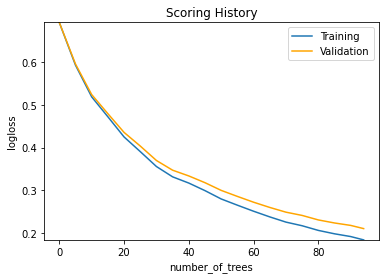

In [62]:
autoML.leader.plot()

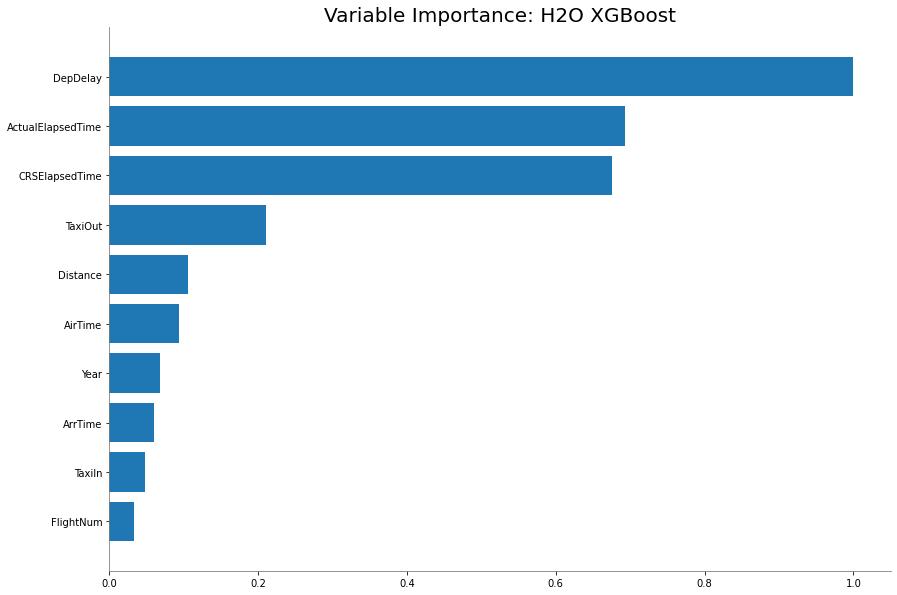

In [63]:
autoML.leader.varimp_plot()

In [64]:
autoML.leader.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,DepDelay,73115.914062,1.000000,0.318322
1,ActualElapsedTime,50663.285156,0.692917,0.220571
2,CRSElapsedTime,49437.722656,0.676155,0.215235
3,TaxiOut,15393.262695,0.210532,0.067017
4,Distance,7749.669434,0.105992,0.033739
...,...,...,...,...
86,Origin.SNA,1.177299,0.000016,0.000005
87,UniqueCarrier.DL,0.914557,0.000013,0.000004
88,Dest.DCA,0.861511,0.000012,0.000004
89,Dest.DEN,0.721771,0.000010,0.000003


In [65]:
perf = autoML.leader.model_performance(test)
perf


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.056557438958019846
RMSE: 0.2378180795440495
LogLoss: 0.21066513633461623
Mean Per-Class Error: 0.05863161047740573
AUC: 0.9866456139581852
AUCPR: 0.963408168966281
Gini: 0.9732912279163703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48620266148022245: 


,,NO,YES,Error,Rate
0,NO,1883.0,125.0,0.0623,(125.0/2008.0)
1,YES,135.0,2319.0,0.055,(135.0/2454.0)
2,Total,2018.0,2444.0,0.0583,(260.0/4462.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.486203,0.946917,205.0
1,max f2,0.354407,0.962582,249.0
2,max f0point5,0.621942,0.957000,163.0
3,max accuracy,0.486203,0.941730,205.0
4,max precision,0.994809,1.000000,0.0
5,max recall,0.121404,1.000000,337.0
6,max specificity,0.994809,1.000000,0.0
7,max absolute_mcc,0.486203,0.882347,205.0
8,max min_per_class_accuracy,0.498175,0.939243,202.0
9,max mean_per_class_accuracy,0.486203,0.941368,205.0



Gains/Lift Table: Avg response rate: 55.00 %, avg score: 55.04 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010758,0.994694,1.818256,1.818256,1.000000,0.994941,1.000000,0.994941,0.019560,0.019560,81.825591,81.825591
1,,2,0.020170,0.993454,1.818256,1.818256,1.000000,0.994051,1.000000,0.994526,0.017115,0.036675,81.825591,81.825591
2,,3,0.030031,0.992034,1.818256,1.818256,1.000000,0.992699,1.000000,0.993926,0.017930,0.054605,81.825591,81.825591
3,,4,0.040117,0.991154,1.818256,1.818256,1.000000,0.991612,1.000000,0.993344,0.018337,0.072942,81.825591,81.825591
4,,5,0.050202,0.990095,1.818256,1.818256,1.000000,0.990682,1.000000,0.992809,0.018337,0.091280,81.825591,81.825591
5,,6,0.100179,0.985394,1.818256,1.818256,1.000000,0.987815,1.000000,0.990318,0.090872,0.182152,81.825591,81.825591
6,,7,0.150157,0.980403,1.818256,1.818256,1.000000,0.983016,1.000000,0.987887,0.090872,0.273024,81.825591,81.825591
7,,8,0.200134,0.969403,1.818256,1.818256,1.000000,0.975767,1.000000,0.984861,0.090872,0.363896,81.825591,81.825591
8,,9,0.300090,0.913625,1.801949,1.812824,0.991031,0.945807,0.997013,0.971852,0.180114,0.544010,80.194868,81.282423
9,,10,0.400045,0.791150,1.797872,1.809088,0.988789,0.859541,0.994958,0.943790,0.179707,0.723716,79.787187,80.908823


In [66]:
print("autoML R2: %.4f" % (autoML.leader.auc()))

autoML R2: 0.9952


In [0]:
h2o.cluster().shutdown()

In [0]:
h2o.shutdown(prompt=False)